In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('flo_dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,third_sol_amount_ml,...,x6_zinc stearate,x6_zinc undecylenate,x7_None,x7_copper bromide,x7_oleic acid,x7_water,x7_zinc iodide,diameter_nm,abs_nm,emission_nm
0,0,0,0,0,0.154575,-0.011188,-0.247025,-0.673379,-0.370637,-0.096002,...,1,0,1,0,0,0,0,1.750000,480.0,539.0
1,1,1,1,1,0.195883,0.280681,-0.439228,-0.658075,-0.370637,-0.096002,...,0,0,1,0,0,0,0,2.610000,610.0,688.5
2,2,2,2,2,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,...,0,0,1,0,0,0,0,3.088889,560.0,595.0
3,3,3,3,3,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,...,0,0,1,0,0,0,0,3.233333,590.0,635.0
4,4,4,4,4,0.154575,-0.011188,-0.247025,-0.604513,-0.370637,-0.096002,...,0,0,1,0,0,0,0,2.383333,482.2,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,214,214,214,0.154575,-0.376755,0.713993,4.491519,-0.370637,-0.096002,...,0,0,1,0,0,0,0,4.000000,585.0,630.0
211,211,215,215,215,7.590031,7.504453,-0.439228,5.524499,-0.370637,-0.096002,...,0,0,1,0,0,0,0,2.833333,465.0,550.0
212,212,216,216,216,2.633061,0.718486,4.173657,6.213152,4.521657,-0.096002,...,0,0,1,0,0,0,0,1.933333,465.0,595.0
213,213,217,217,217,2.633061,0.718486,4.173657,6.213152,4.521657,-0.096002,...,0,0,1,0,0,0,0,3.033333,495.0,595.0


In [20]:
# Input for ML models


input_col = ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 'third_sol_amount_ml',
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min', 'x0_chloroindium oxalate', 'x0_indium acetate',
       'x0_indium bromide', 'x0_indium chloride', 'x0_indium iodide',
       'x0_indium myristate', 'x0_indium oxalate', 'x0_indium palmitate',
       'x0_indium trifluoroacetate',
       'x0_indium tris(N,N-diisopropylacetamidinato)',
       'x1_bis(trimethylsilyl)phosphine', 'x1_phosphine gas',
       'x1_phosphorus trichloride', 'x1_sodium phosphide',
       'x1_tris(diethylamino)phosphine', 'x1_tris(dimethylamino)phosphine',
       'x1_tris(trimethylgermyl)phosphine', 'x1_tris(trimethylsilyl)phosphine',
       'x1_white phosphorus', 'x2_None', 'x2_dodecanethiol', 'x2_lauric acid',
       'x2_myristic acid', 'x2_oleic acid', 'x2_palmitic acid',
       'x2_stearic acid', 'x3_4-ethylpyridine', 'x3_None',
       'x3_dimethylformamide', 'x3_dodecylamine', 'x3_mesitylene',
       'x3_octadecene', 'x3_oleylamine', 'x3_trioctylamine',
       'x3_trioctylphosphine', 'x3_trioctylphosphine oxide', 'x4_None',
       'x4_dioctyl ether', 'x4_dioctylamine', 'x4_hexadecylamine',
       'x4_octylamine', 'x4_oleylamine', 'x4_toluene', 'x4_trioctylphosphine',
       'x4_trioctylphosphine oxide', 'x5_None', 'x5_trioctylphosphine',
       'x6_None', 'x6_acetic acid', 'x6_superhydride',
       'x6_tetrabutylammonium myristate', 'x6_zinc acetate', 'x6_zinc bromide',
       'x6_zinc chloride', 'x6_zinc iodide', 'x6_zinc octanoate',
       'x6_zinc oleate', 'x6_zinc stearate', 'x6_zinc undecylenate', 'x7_None',
       'x7_copper bromide', 'x7_oleic acid', 'x7_water', 'x7_zinc iodide']

output_col = ['diameter_nm', 'abs_nm', 'emission_nm']

X = df[input_col]

Y = df[output_col]

In [21]:
# Splitting dataset for training

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

In [22]:
Y.shape

(215, 3)

In [23]:
X.shape

(215, 75)

In [24]:
#This is used to roughly show which regression performs better.
# Testing Regressions:

REGRESSIONS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     
                                       random_state=44),
    "K-nn": KNeighborsRegressor(),                          
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(max_depth=4, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
            }
# r2 is used to evaluate the performance of all regressions.

r2_list = list()

for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name, '\n')
    
# This loop will show r2 for each outcome
    for column in range(0, 3):
        r2 = r2_score(Y_test.iloc[:, column], Y_pred.iloc[:, column])
        r2_list.append(r2)
    
    print(' R^2 for diameter is ', r2_list[0], '\n',
          'R^2 for Absorbance is ', r2_list[1], '\n',
          'R^2 for PL is ', r2_list[2], '\n', '\n', 
         )
    del r2_list[:] #reset the list for the next regression

Extra trees 

 R^2 for diameter is  0.19466742586561692 
 R^2 for Absorbance is  0.7061921147714924 
 R^2 for PL is  0.5570224290853848 
 

K-nn 

 R^2 for diameter is  -0.007089144045259177 
 R^2 for Absorbance is  0.5666694735258133 
 R^2 for PL is  0.4355519925134915 
 

Linear regression 

 R^2 for diameter is  -7.243587228452978e+23 
 R^2 for Absorbance is  -8.411824508489305e+24 
 R^2 for PL is  -4.4844146576469445e+24 
 

Ridge 

 R^2 for diameter is  0.17091625558000811 
 R^2 for Absorbance is  0.583469359444041 
 R^2 for PL is  0.44049278786757196 
 

Lasso 

 R^2 for diameter is  -0.8883328537713808 
 R^2 for Absorbance is  0.5728985648554876 
 R^2 for PL is  0.44700109070465943 
 

ElasticNet 

 R^2 for diameter is  -0.8883328537713808 
 R^2 for Absorbance is  0.23587459901311736 
 R^2 for PL is  0.14537254395129684 
 

RandomForestRegressor 

 R^2 for diameter is  -0.015232245469606776 
 R^2 for Absorbance is  0.6027656179957985 
 R^2 for PL is  0.5094990986331629 
 

Decis

## Optimizing


### 1. Extra Trees

In [25]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train, Y_train)
            ET_Y_pred = pd.DataFrame(ET_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [11:34<00:00, 28.94s/it]

9.173946127921214 5 5 13


In [36]:

ET_regr = ExtraTreesRegressor(n_estimators=5,
                            max_features=5,     
                            random_state=13).fit(X_train, Y_train)
            
ET_regr.fit(X_train, Y_train)            
ET_Y_pred = ET_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE, '; MAE:', ET_MAE )

diameter:  r2: 0.15632289902327157 ; MSE: 0.19851516645572106 ; RMSE: 0.4455504084340189 ; MAE: 0.2875959595212121
absorbance:  r2: 0.8638710887637 ; MSE: 292.41115151515163 ; RMSE: 17.100033670000524 ; MAE: 12.984242424242428
emission:  r2: 0.7190057119245465 ; MSE: 417.45159090909084 ; RMSE: 20.431632115645847 ; MAE: 14.250000000000004


### 2. Decision Tree 

In [27]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 80, 5):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)
            DT_Y_pred = pd.DataFrame(DT_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [01:06<00:00,  3.31s/it]

12.415467190388485 18 1 15


In [28]:
DT_regr = DecisionTreeRegressor(max_depth=18,
                                max_features=1,
                                random_state=15)
            
DT_regr.fit(X_train, Y_train)            
DT_Y_pred = DT_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    DT_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    DT_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    DT_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i], squared=False)
    DT_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', DT_r2, '; MSE:', DT_MSE, '; RMSE:', DT_RMSE, '; MAE:', DT_MAE )

diameter:  r2: -0.3810057940523248 ; MSE: 0.3249472988720771 ; RMSE: 0.570041488728739 ; MAE: 0.3767854095492929
absorbance:  r2: 0.6979525123760519 ; MSE: 648.8118715286198 ; RMSE: 25.471785793866513 ; MAE: 17.92183838383839
emission:  r2: 0.45210316615914947 ; MSE: 813.9681646464649 ; RMSE: 28.530127315637145 ; MAE: 18.947777777777773


### 3. Random Forest

In [30]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 29)):
    for j in range(1, 29):
        for k in range(2, 50, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train, Y_train)
            RF_Y_pred = pd.DataFrame(RF_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 28/28 [10:46<00:00, 23.07s/it]

10.282246025035173 14 8 20


In [31]:
RF_regr = RandomForestRegressor(max_depth=14, 
                                n_estimators=8, 
                                max_features=20,
                                random_state=45)
            
RF_regr.fit(X_train, Y_train)            
RF_Y_pred = RF_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    RF_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    RF_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    RF_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i], squared=False)
    RF_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', RF_r2, '; MSE:', RF_MSE, '; RMSE:', RF_RMSE, '; MAE:', RF_MAE )

diameter:  r2: 0.2382527141514139 ; MSE: 0.17923728055717011 ; RMSE: 0.42336424099960324 ; MAE: 0.33303858015602905
absorbance:  r2: 0.8504086062401859 ; MSE: 321.3291820878051 ; RMSE: 17.92565708942925 ; MAE: 14.171117424242423
emission:  r2: 0.7097117794326309 ; MSE: 431.25887123184975 ; RMSE: 20.76677325035957 ; MAE: 16.342582070707067


### 4. K Neighbors

In [32]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train, Y_train)

        KNN_Y_pred = KNN_reg.predict(X_test)

        mae = mean_absolute_error(Y_test, KNN_Y_pred)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:27<00:00,  1.44it/s]

12.127261503888889 2 5


In [33]:
KNN_reg = KNeighborsRegressor(n_neighbors=2, 
                              p=5).fit(X_train, Y_train)

KNN_Y_pred = KNN_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    KNN_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    KNN_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    KNN_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i], squared=False)
    KNN_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', KNN_r2, '; MSE:', KNN_MSE, '; RMSE:', KNN_RMSE, '; MAE:', KNN_MAE)

diameter: r2: 0.06897807678515755 ; MSE: 0.21906719033496447 ; RMSE: 0.468046141245673 ; MAE: 0.33632996621212125
Abs: r2: 0.7070064320530501 ; MSE: 629.3636363636364 ; RMSE: 25.087120926157237 ; MAE: 18.515151515151516
PL: r2: 0.5597857580167673 ; MSE: 653.9924242424242 ; RMSE: 25.57327558687827 ; MAE: 17.53030303030303


### 5. Lasso

In [54]:
min_mae = 9999

min_i, min_j = 0, 0

for i in tqdm(np.arange(0.1, 2.0, 0.02)):
    for j in range(1, 100):
        L_reg = Lasso(alpha=i, random_state=j).fit(X_train, Y_train)
        
        L_Y_pred = L_reg.predict(X_test)
        L_r2 = r2_score(Y_test, pd.DataFrame(L_Y_pred))
      
        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

            
print(min_mae, min_i, min_j)

  0%|          | 0/95 [00:00<?, ?it/s]/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

18.478823529411766 0.1 1


### Saving Extra Trees model

In [34]:
ET_regr = ExtraTreesRegressor(n_estimators=5,
                            max_features=5,     
                            random_state=13).fit(X_train, Y_train)

ET_Y_pred = ET_regr.predict(X_test)

joblib.dump(ET_regr, "./model_MO_ExtraTrees.joblib")

['./model_MO_ExtraTrees.joblib']

## Analyzing

In [37]:
ET_regr = ExtraTreesRegressor(n_estimators=5,
                            max_features=5,     
                            random_state=13).fit(X_train, Y_train)
ET_regr.fit(X_train, Y_train)            
ET_Y_pred = ET_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MAE:', ET_MAE, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE )

diameter:  r2: 0.15632289902327157 ; MAE: 0.2875959595212121 ; MSE: 0.19851516645572106 ; RMSE: 0.4455504084340189
absorbance:  r2: 0.8638710887637 ; MAE: 12.984242424242428 ; MSE: 292.41115151515163 ; RMSE: 17.100033670000524
emission:  r2: 0.7190057119245465 ; MAE: 14.250000000000004 ; MSE: 417.45159090909084 ; RMSE: 20.431632115645847


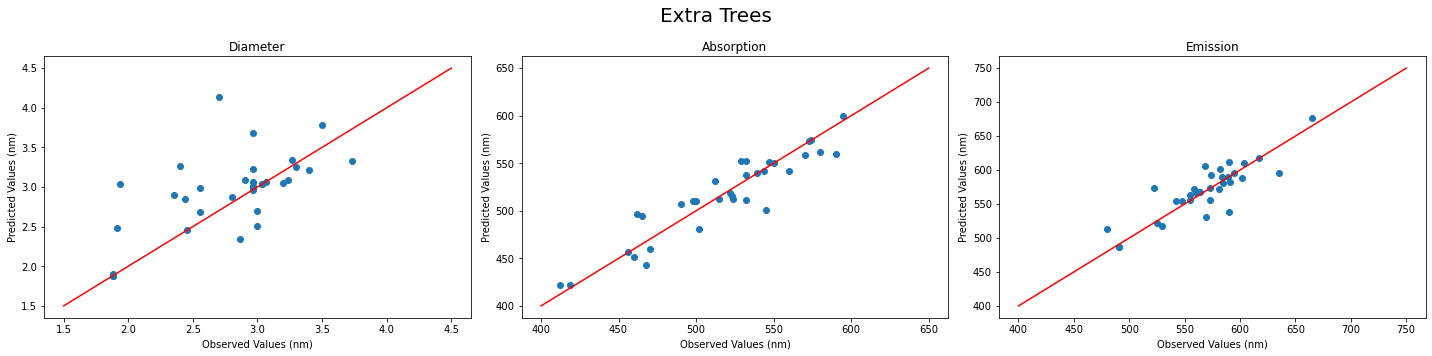

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Extra Trees', fontsize=20)

ax1.plot(Y_test.iloc[:, 0], pd.DataFrame(ET_Y_pred).loc[:, 0],'o')
ax1.plot([1.5,4.5],[1.5,4.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test.iloc[:, 1], pd.DataFrame(ET_Y_pred).loc[:, 1],'o')
ax2.plot([400,650],[400,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test.iloc[:, 2], pd.DataFrame(ET_Y_pred).loc[:, 2],'o')
ax3.plot([400,750],[400,750], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

In [43]:
importance_dict = dict()
for i in range(0,71):
    importance_dict[input_col[i]] = ET_regr.feature_importances_[i]

sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

top5 = DataFrame(sorted_importance[0:5], columns=['features', 'importance score'])

others = DataFrame(sorted_importance[5:], columns=['features', 'importance score'])

combined_others = pd.DataFrame(data = {
    'features' : ['others'],
    'importance score' : [others['importance score'].sum()]
})

#combining top 5 with others
imp_score = pd.concat([top5, combined_others])

sorted_importance


[('temp_c', 0.13881894556756333),
 ('time_min', 0.1350400507665708),
 ('x6_zinc iodide', 0.05697311762572119),
 ('x6_None', 0.04555469698515503),
 ('x1_tris(trimethylsilyl)phosphine', 0.04184765336540066),
 ('x6_zinc oleate', 0.03554918487306324),
 ('p_amount_mmol', 0.03241565931460313),
 ('other_2_amount_mmol', 0.027895521507863584),
 ('x1_phosphine gas', 0.02779120634075471),
 ('x0_indium oxalate', 0.02733434402538269),
 ('x4_trioctylphosphine oxide', 0.02713814313914367),
 ('x2_myristic acid', 0.026107099935913217),
 ('in_amount_mmol', 0.025602350401102824),
 ('x3_trioctylphosphine', 0.021277888068805567),
 ('second_sol_amount_ml', 0.02087417441806296),
 ('other_1_amount_mmol', 0.01970805582371861),
 ('x4_None', 0.019426320401838205),
 ('ligand_amount_mmol', 0.018667176918944695),
 ('total_volume_ml', 0.017700771602618976),
 ('first_sol_amount_ml', 0.017150552228650612),
 ('x0_indium chloride', 0.01712605829432528),
 ('x0_indium iodide', 0.016504681715971584),
 ('x0_chloroindium oxa

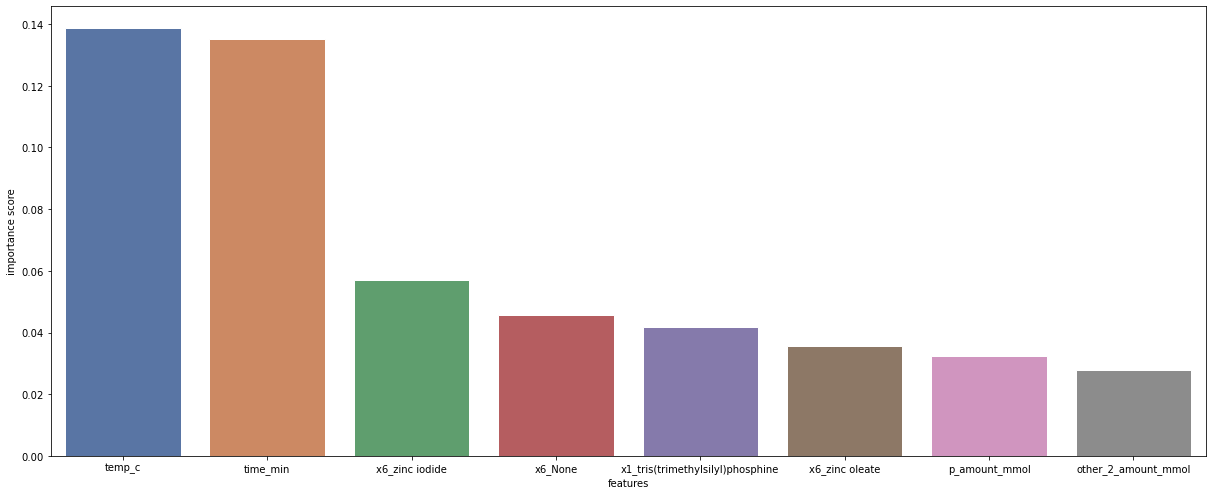

In [44]:
top7 = DataFrame(sorted_importance[0:8], columns=['features', 'importance score'])

others2 = DataFrame(sorted_importance[8:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7)